In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# 📂 Load datasets
rdf = pd.read_csv('/content/drive/MyDrive/rain/rainfalldata.xls - rainfalldata.xls.csv')
tdf = pd.read_csv('/content/drive/MyDrive/rain/annualdatamean.csv')

# 🛠️ Rename columns to match
tdf.rename(columns={
    'ANNUAL': 'ANN',
    'JAN-FEB': 'JF',
    'MAR-MAY': 'MAM',
    'JUN-SEP': 'JJAS',
    'OCT-DEC': 'OND'
}, inplace=True)

# ✅ Select top important features
# From rdf
rdf_features = ['YEAR', 'JJAS', 'OND', 'MAY', 'JUL', 'SEP', 'JAN', 'AUG', 'MAR', 'MAM']

# From tdf
tdf_features = ['YEAR', 'OND', 'JF', 'FEB', 'JJAS', 'MAM', 'AUG', 'JAN', 'MAY', 'JUN']

# 📚 Keep only the selected columns
rdf = rdf[rdf_features + ['ANN']]
tdf = tdf[tdf_features]

# 🤝 Merge datasets on YEAR (inner join)
merged = pd.merge(tdf, rdf, on='YEAR', how='inner')

print("Merged dataset shape:", merged.shape)
print(merged.head())

# 🧹 Prepare input (X) and output (y)
X = merged.drop(columns=['YEAR', 'ANN'])
y = merged['ANN']

# 🔀 Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_evaluate_compare(X_train, y_train, X_test, y_test, model_path='decision_tree_model.pkl'):
    # 🌳 Build Decision Tree Regressor
    model = DecisionTreeRegressor(random_state=42)

    # 🔟 10-Fold Cross Validation on the training set
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    # Define scoring
    scoring = {
        'r2': 'r2',
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error'
    }

    # Perform cross-validation on the training set
    cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Save the model
    joblib.dump(model, model_path)

    # 📈 Report metrics for cross-validation on the training set
    r2_train = np.mean(cv_results['test_r2'])
    rmse_train = np.mean(np.sqrt(-cv_results['test_neg_mean_squared_error']))
    mae_train = np.mean(-cv_results['test_neg_mean_absolute_error'])

    print("\n📊 Model Performance (10-Fold CV on Training Set):")
    print(f"R² Score: {r2_train:.4f}")
    print(f"RMSE: {rmse_train:.4f}")
    print(f"MAE: {mae_train:.4f}")

    # Load the saved model
    loaded_model = joblib.load(model_path)

    # Evaluate the model on the test set
    y_pred = loaded_model.predict(X_test)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_test = mean_absolute_error(y_test, y_pred)

    print("\n📊 Model Performance on Test Set:")
    print(f"R² Score: {r2_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"MAE: {mae_test:.4f}")

    # Compare performance
    print("\n📊 Performance Comparison:")
    print(f"R² Score (Train vs Test): {r2_train:.4f} vs {r2_test:.4f}")
    print(f"RMSE (Train vs Test): {rmse_train:.4f} vs {rmse_test:.4f}")
    print(f"MAE (Train vs Test): {mae_train:.4f} vs {mae_test:.4f}")

# Call the function
train_evaluate_compare(X_train, y_train, X_test, y_test)

Merged dataset shape: (116, 20)
   YEAR  OND_x     JF    FEB  JJAS_x  MAM_x  AUG_x  JAN_x  MAY_x    JUN  \
0  1901  23.10  20.11  20.89   28.16  27.64  27.33  19.32  29.76  29.85   
1  1902  22.51  20.88  21.58   27.98  27.96  27.71  20.17  30.00  29.47   
2  1903  22.33  19.99  20.71   28.00  27.02  27.16  19.28  29.47  29.53   
3  1904  22.56  19.76  20.32   27.57  27.23  27.26  19.19  29.17  28.80   
4  1905  23.13  18.36  18.37   28.20  26.38  27.65  18.34  29.73  29.87   

   JJAS_y  OND_y  MAY_y    JUL    SEP  JAN_y  AUG_y   MAR  MAM_y     ANN  
0   722.0  106.6   39.1  222.5  125.6   27.4  259.0  11.3   82.0   971.7  
1   791.8  124.4   41.8  279.6  211.2    6.7  197.2  10.2   87.4  1012.8  
2   860.8  187.4   56.2  278.9  195.7    8.5  259.3  10.2   78.5  1140.7  
3   750.3   89.6   68.6  247.6  126.2    5.9  197.0  20.3  120.0   974.4  
4   716.4   73.3   47.6  245.6  174.8   12.8  205.2  28.6  103.3   920.2  

📊 Model Performance (10-Fold CV on Training Set):
R² Score: 0.7869

Merged dataset shape: (116, 20)
   YEAR  OND_x     JF    FEB  JJAS_x  MAM_x  AUG_x  JAN_x  MAY_x    JUN  \
0  1901  23.10  20.11  20.89   28.16  27.64  27.33  19.32  29.76  29.85   
1  1902  22.51  20.88  21.58   27.98  27.96  27.71  20.17  30.00  29.47   
2  1903  22.33  19.99  20.71   28.00  27.02  27.16  19.28  29.47  29.53   
3  1904  22.56  19.76  20.32   27.57  27.23  27.26  19.19  29.17  28.80   
4  1905  23.13  18.36  18.37   28.20  26.38  27.65  18.34  29.73  29.87   

   JJAS_y  OND_y  MAY_y    JUL    SEP  JAN_y  AUG_y   MAR  MAM_y     ANN  
0   722.0  106.6   39.1  222.5  125.6   27.4  259.0  11.3   82.0   971.7  
1   791.8  124.4   41.8  279.6  211.2    6.7  197.2  10.2   87.4  1012.8  
2   860.8  187.4   56.2  278.9  195.7    8.5  259.3  10.2   78.5  1140.7  
3   750.3   89.6   68.6  247.6  126.2    5.9  197.0  20.3  120.0   974.4  
4   716.4   73.3   47.6  245.6  174.8   12.8  205.2  28.6  103.3   920.2  

📊 Model Performance (10-Fold CV on Training Set):
R² Score: 0.7869

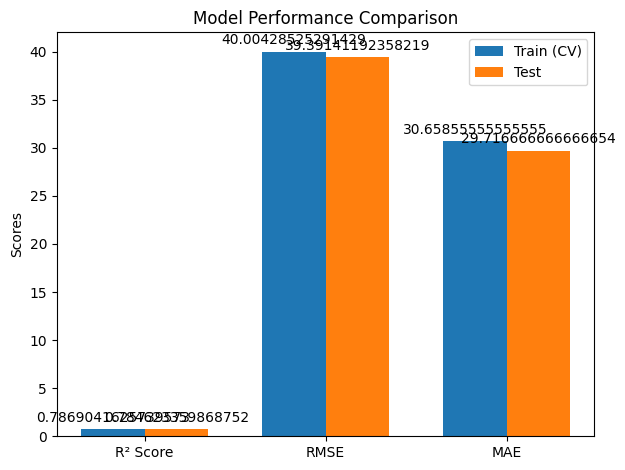

In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt

# 📂 Load datasets
rdf = pd.read_csv('/content/drive/MyDrive/rain/rainfalldata.xls - rainfalldata.xls.csv')
tdf = pd.read_csv('/content/drive/MyDrive/rain/annualdatamean.csv')

# 🛠️ Rename columns to match
tdf.rename(columns={
    'ANNUAL': 'ANN',
    'JAN-FEB': 'JF',
    'MAR-MAY': 'MAM',
    'JUN-SEP': 'JJAS',
    'OCT-DEC': 'OND'
}, inplace=True)

# ✅ Select top important features
# From rdf
rdf_features = ['YEAR', 'JJAS', 'OND', 'MAY', 'JUL', 'SEP', 'JAN', 'AUG', 'MAR', 'MAM']

# From tdf
tdf_features = ['YEAR', 'OND', 'JF', 'FEB', 'JJAS', 'MAM', 'AUG', 'JAN', 'MAY', 'JUN']

# 📚 Keep only the selected columns
rdf = rdf[rdf_features + ['ANN']]
tdf = tdf[tdf_features]

# 🤝 Merge datasets on YEAR (inner join)
merged = pd.merge(tdf, rdf, on='YEAR', how='inner')

print("Merged dataset shape:", merged.shape)
print(merged.head())

# 🧹 Prepare input (X) and output (y)
X = merged.drop(columns=['YEAR', 'ANN'])
y = merged['ANN']

# 🔀 Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_evaluate_compare(X_train, y_train, X_test, y_test, model_path='decision_tree_model.pkl'):
    # 🌳 Build Decision Tree Regressor
    model = DecisionTreeRegressor(random_state=42)

    # 🔟 10-Fold Cross Validation on the training set
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    # Define scoring
    scoring = {
        'r2': 'r2',
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error'
    }

    # Perform cross-validation on the training set
    cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Save the model
    joblib.dump(model, model_path)

    # 📈 Report metrics for cross-validation on the training set
    r2_train = np.mean(cv_results['test_r2'])
    rmse_train = np.mean(np.sqrt(-cv_results['test_neg_mean_squared_error']))
    mae_train = np.mean(-cv_results['test_neg_mean_absolute_error'])

    print("\n📊 Model Performance (10-Fold CV on Training Set):")
    print(f"R² Score: {r2_train:.4f}")
    print(f"RMSE: {rmse_train:.4f}")
    print(f"MAE: {mae_train:.4f}")

    # Load the saved model
    loaded_model = joblib.load(model_path)

    # Evaluate the model on the test set
    y_pred = loaded_model.predict(X_test)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_test = mean_absolute_error(y_test, y_pred)

    print("\n📊 Model Performance on Test Set:")
    print(f"R² Score: {r2_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"MAE: {mae_test:.4f}")

    # Compare performance
    print("\n📊 Performance Comparison:")
    print(f"R² Score (Train vs Test): {r2_train:.4f} vs {r2_test:.4f}")
    print(f"RMSE (Train vs Test): {rmse_train:.4f} vs {rmse_test:.4f}")
    print(f"MAE (Train vs Test): {mae_train:.4f} vs {mae_test:.4f}")

    # Visualize the performance comparison
    metrics = ['R² Score', 'RMSE', 'MAE']
    train_scores = [r2_train, rmse_train, mae_train]
    test_scores = [r2_test, rmse_test, mae_test]

    x = np.arange(len(metrics))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, train_scores, width, label='Train (CV)')
    rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

# Call the function
train_evaluate_compare(X_train, y_train, X_test, y_test)


In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import joblib
import matplotlib.pyplot as plt

# 📂 Load datasets
rdf = pd.read_csv('/content/drive/MyDrive/rain/rainfalldata.xls - rainfalldata.xls.csv')
tdf = pd.read_csv('/content/drive/MyDrive/rain/annualdatamean.csv')

# 🛠️ Rename columns to match
tdf.rename(columns={
    'ANNUAL': 'ANN',
    'JAN-FEB': 'JF',
    'MAR-MAY': 'MAM',
    'JUN-SEP': 'JJAS',
    'OCT-DEC': 'OND'
}, inplace=True)

# ✅ Select top important features
rdf_features = ['YEAR', 'JJAS', 'OND', 'MAY', 'JUL', 'SEP', 'JAN', 'AUG', 'MAR', 'MAM']
tdf_features = ['YEAR', 'OND', 'JF', 'FEB', 'JJAS', 'MAM', 'AUG', 'JAN', 'MAY', 'JUN']

# 📚 Keep only the selected columns
rdf = rdf[rdf_features + ['ANN']]
tdf = tdf[tdf_features]

# 🤝 Merge datasets on YEAR (inner join)
merged = pd.merge(tdf, rdf, on='YEAR', how='inner')

print("✅ Merged dataset shape:", merged.shape)
print(merged.head())

# 🧹 Prepare input (X) and output (y)
X = merged.drop(columns=['YEAR', 'ANN'])
y = merged['ANN']

# 📈 Train model on full historical data
full_model = DecisionTreeRegressor(random_state=42)
full_model.fit(X, y)

print("\n✅ Model trained on full historical data (till 2016)")

# 🌟 Save the model (optional)
joblib.dump(full_model, 'rainfall_prediction_model.pkl')
print("💾 Model saved as 'rainfall_prediction_model.pkl'")

# 🔥 Feature importance
if hasattr(full_model, 'feature_importances_'):
    importances = full_model.feature_importances_
    feature_names = X.columns
    feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    print("\n🌟 Feature Importances:")
    print(feature_importance)

# 🔮 Prepare Future Input Data for 2022 and 2023
# ⚠️ Replace these sample values with real data if available
future_years = [2022, 2023]
future_features = {
    'OND': [20.5, 21.0],  # Example OND temperatures
    'JF': [15.2, 14.9],
    'FEB': [16.5, 16.8],
    'JJAS': [250.0, 260.0],
    'MAM': [80.0, 85.0],
    'AUG': [90.0, 95.0],
    'JAN': [12.1, 11.8],
    'MAY': [30.0, 32.0],
    'JUN': [200.0, 210.0]
}

future_df = pd.DataFrame(future_features)
print("\n📄 Future Feature DataFrame:")
print(future_df)

# 🚀 Predict Future Rainfall
future_predictions = full_model.predict(future_df)

# 📊 Display predictions
print("\n🔮 Future Rainfall Predictions:")
for year, prediction in zip(future_years, future_predictions):
    print(f"Year {year}: Predicted Rainfall = {prediction:.2f} mm")

# 📊 Optional: Plot Predictions
plt.figure(figsize=(8,5))
plt.bar(future_years, future_predictions, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Predicted Annual Rainfall (mm)')
plt.title('Future Rainfall Predictions (2022-2023)')
plt.grid(True)
plt.show()


✅ Merged dataset shape: (116, 20)
   YEAR  OND_x     JF    FEB  JJAS_x  MAM_x  AUG_x  JAN_x  MAY_x    JUN  \
0  1901  23.10  20.11  20.89   28.16  27.64  27.33  19.32  29.76  29.85   
1  1902  22.51  20.88  21.58   27.98  27.96  27.71  20.17  30.00  29.47   
2  1903  22.33  19.99  20.71   28.00  27.02  27.16  19.28  29.47  29.53   
3  1904  22.56  19.76  20.32   27.57  27.23  27.26  19.19  29.17  28.80   
4  1905  23.13  18.36  18.37   28.20  26.38  27.65  18.34  29.73  29.87   

   JJAS_y  OND_y  MAY_y    JUL    SEP  JAN_y  AUG_y   MAR  MAM_y     ANN  
0   722.0  106.6   39.1  222.5  125.6   27.4  259.0  11.3   82.0   971.7  
1   791.8  124.4   41.8  279.6  211.2    6.7  197.2  10.2   87.4  1012.8  
2   860.8  187.4   56.2  278.9  195.7    8.5  259.3  10.2   78.5  1140.7  
3   750.3   89.6   68.6  247.6  126.2    5.9  197.0  20.3  120.0   974.4  
4   716.4   73.3   47.6  245.6  174.8   12.8  205.2  28.6  103.3   920.2  

✅ Model trained on full historical data (till 2016)
💾 Model save

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AUG
- JAN
- JJAS
- MAM
- MAY
- ...
Feature names seen at fit time, yet now missing:
- AUG_x
- AUG_y
- JAN_x
- JAN_y
- JJAS_x
- ...


✅ Merged dataset shape: (116, 20)
   YEAR    OND     JF    FEB   JJAS    MAM    AUG    JAN    MAY    JUN  \
0  1901  23.10  20.11  20.89  28.16  27.64  27.33  19.32  29.76  29.85   
1  1902  22.51  20.88  21.58  27.98  27.96  27.71  20.17  30.00  29.47   
2  1903  22.33  19.99  20.71  28.00  27.02  27.16  19.28  29.47  29.53   
3  1904  22.56  19.76  20.32  27.57  27.23  27.26  19.19  29.17  28.80   
4  1905  23.13  18.36  18.37  28.20  26.38  27.65  18.34  29.73  29.87   

   JJAS_y  OND_y  MAY_y    JUL    SEP  JAN_y  AUG_y   MAR  MAM_y     ANN  
0   722.0  106.6   39.1  222.5  125.6   27.4  259.0  11.3   82.0   971.7  
1   791.8  124.4   41.8  279.6  211.2    6.7  197.2  10.2   87.4  1012.8  
2   860.8  187.4   56.2  278.9  195.7    8.5  259.3  10.2   78.5  1140.7  
3   750.3   89.6   68.6  247.6  126.2    5.9  197.0  20.3  120.0   974.4  
4   716.4   73.3   47.6  245.6  174.8   12.8  205.2  28.6  103.3   920.2  

✅ Model trained on full historical data (till 2016)
💾 Model saved as '

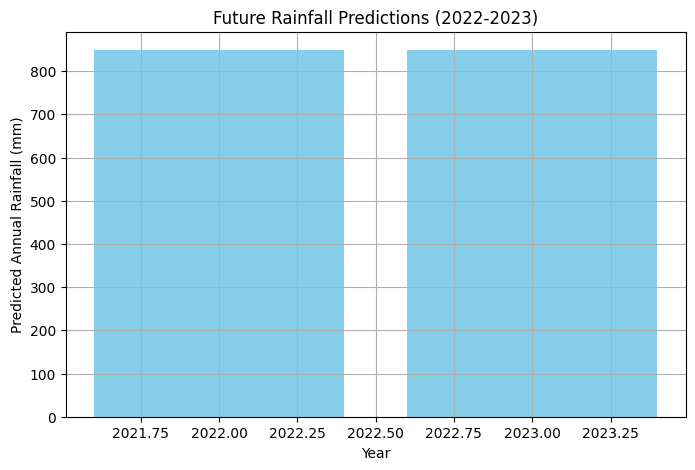

In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import joblib
import matplotlib.pyplot as plt

# 📂 Load datasets
rdf = pd.read_csv('/content/drive/MyDrive/rain/rainfalldata.xls - rainfalldata.xls.csv')
tdf = pd.read_csv('/content/drive/MyDrive/rain/annualdatamean.csv')

# 🛠️ Rename columns to match
tdf.rename(columns={
    'ANNUAL': 'ANN',
    'JAN-FEB': 'JF',
    'MAR-MAY': 'MAM',
    'JUN-SEP': 'JJAS',
    'OCT-DEC': 'OND'
}, inplace=True)

# ✅ Select top important features
rdf_features = ['YEAR', 'JJAS', 'OND', 'MAY', 'JUL', 'SEP', 'JAN', 'AUG', 'MAR', 'MAM']
tdf_features = ['YEAR', 'OND', 'JF', 'FEB', 'JJAS', 'MAM', 'AUG', 'JAN', 'MAY', 'JUN']

# 📚 Keep only the selected columns
rdf = rdf[rdf_features + ['ANN']]
tdf = tdf[tdf_features]

# 🤝 Merge datasets on YEAR (inner join)
merged = pd.merge(tdf, rdf, on='YEAR', how='inner', suffixes=('', '_y')) # Add suffixes to avoid column name conflicts

print("✅ Merged dataset shape:", merged.shape)
print(merged.head())

# 🧹 Prepare input (X) and output (y)
X = merged.drop(columns=['YEAR', 'ANN'])
y = merged['ANN']

# 📈 Train model on full historical data
full_model = DecisionTreeRegressor(random_state=42)
full_model.fit(X, y)

print("\n✅ Model trained on full historical data (till 2016)")

# 🌟 Save the model (optional)
joblib.dump(full_model, 'rainfall_prediction_model.pkl')
print("💾 Model saved as 'rainfall_prediction_model.pkl'")

# 🔥 Feature importance
if hasattr(full_model, 'feature_importances_'):
    importances = full_model.feature_importances_
    feature_names = X.columns
    feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    print("\n🌟 Feature Importances:")
    print(feature_importance)
# 🔮 Prepare Future Input Data for 2022 and 2023
# ⚠️ Replace these sample values with real data if available
future_years = [2022, 2023]
future_features = {
    'OND': [20.5, 21.0],  # Example OND temperatures
    'JF': [15.2, 14.9],
    'FEB': [16.5, 16.8],
    'JJAS': [250.0, 260.0],
    'MAM': [80.0, 85.0],
    'AUG': [90.0, 95.0],
    'JAN': [12.1, 11.8],
    'MAY': [30.0, 32.0],
    'JUN': [200.0, 210.0],
    # Add columns to match the training data
    'JJAS_y': [0, 0], # Replace with actual values if available
    'OND_y': [0, 0], # Replace with actual values if available
    'MAY_y': [0, 0], # Replace with actual values if available
    'JUL': [0, 0], # Replace with actual values if available
    'SEP': [0, 0], # Replace with actual values if available
    'JAN_y': [0, 0], # Replace with actual values if available
    'AUG_y': [0, 0], # Replace with actual values if available
    'MAR': [0, 0], # Replace with actual values if available
    'MAM_y': [0, 0] # Replace with actual values if available

}

future_df = pd.DataFrame(future_features)
print("\n📄 Future Feature DataFrame:")
print(future_df)

# 🚀 Predict Future Rainfall
# The following line no longer needs [X.columns] as future_df now has all required columns
future_predictions = full_model.predict(future_df)
# 📊 Display predictions
print("\n🔮 Future Rainfall Predictions:")
for year, prediction in zip(future_years, future_predictions):
    print(f"Year {year}: Predicted Rainfall = {prediction:.2f} mm")

# 📊 Optional: Plot Predictions
plt.figure(figsize=(8,5))
plt.bar(future_years, future_predictions, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Predicted Annual Rainfall (mm)')
plt.title('Future Rainfall Predictions (2022-2023)')
plt.grid(True)
plt.show()